#Proyecto Final
##Diplomado Machine Laearning - UCOM PRO
###Universidad Comunera
####Diciembre 2020
####Orlando Chaparro
###Proyecto:
Detección Automática de Matriculas de Autovehículos
Usando técnicas de Machine Learning.. 

El presente proyecto muestra el proceso de detección Automática de Matrículas de autmóviles y reconocimiento de Números. 
Utilizando Modelo Pre entrenados, Tecnicas de Computer vision con OpenCV y Reconocimiento de Carácteres con Neural Network. 

###El proyecto consta de tres partes Pirncipales: 

###Parte 1: 
Implemetar un modelo Pre entrenado llamado Wpod-net (https://programmerclick.com/article/83711379808/) Para detectar y extraer las placas (Matrículas) desde imágenes de Vehículos.  

###Parte 2: 
Detección y Segmentación de los Caráctares de las Matrículas utilizando OpenCV 
Procesando imágenes segmentadas cambiandolas de RGB a tonos de Grises, y Contrastántolas para detectar caráteres.

###Parte 3: 
Predicción de los Caracters segementados obtenidos y su reconocimento como Texto 

Extra: Proceso de Entrenamiento de Redes Neuronales para Predecir Carácteres y crear el modelo predictivo.



Fuente: Quang Nguyen
https://medium.com/@quangnhatnguyenle/detect-and-recognize-vehicles-license-plate-with-machine-learning-and-python-part-1-detection-795fda47e922

Github: https://github.com/quangnhat185/Plate_detect_and_recognize




In [1]:
# Importacion de librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import splitext,basename
#from keras.models import model_from_json
from keras.models import model_from_json
from tensorflow.keras.models import model_from_json
import glob

In [2]:
# Si va a probar desde Google Drive con Collab  
# La notebook y datasets están todos en Googl Drive listos para ser probados  
# si no desea probarlo en su entorno propio.

#Acceso al google Drive desde el Google collab 
from google.colab import drive
drive.mount('/content/drive/', 'force_remount=True')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/ucom')
from local_utils import detect_lp


Mounted at /content/drive/


#### Si esta usando Google Collab desde Google Drive.
#### Debe ejecutar esta linea para posicionarse en la carpeta del proyecto en Google Drive

In [6]:
cd 'drive/My Drive/Colab Notebooks/ucom'

/content/drive/My Drive/Colab Notebooks/ucom


In [ ]:
#Si va a usar su entorno propio, si bajó todo el proyecto o lo clonó de Github 
# descomentar la sgte. linea.
#from local_utils import detect_lp

In [7]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

#### Modelo WPOD-NET 
##Warped Planar Object Detection Network - Red de detección de objetos planos deformados
## Modelo pre-entrenado WPOD-NET 
##para la detección de la Zona Matrícula (Chapa) en la Imagen.



In [8]:
# En esta celda se ejecuta la carga del Modelo wpod-net 
# importante que salga el mensaje Loading model Successfully. 
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


In [9]:
#Funcion de Prepoceso de la Imagen
# Reliza la lectura de la imagen, calbio de Esquema de Color RGB, redimensión
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

Se encontradon  6 imágenes...


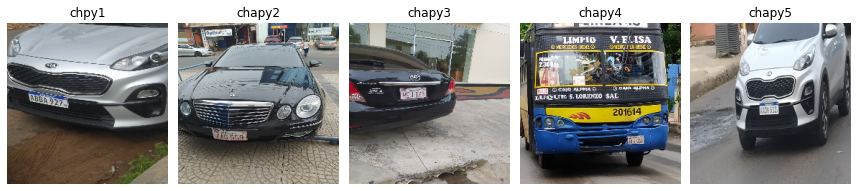

In [11]:
# Crea una lista de images_paths - Lee las imágens del directorio de imágenes de ejemplo 
image_paths = glob.glob("images/*.jpg")
print("Se encontradon  %i imágenes..."%(len(image_paths)))

# Solo Visualiza las imagenes de ejemplo que se tienen en la carpeta images 
# 
fig = plt.figure(figsize=(12,8))
# Cols y rows depende de la cantidad de imagenes en la carpeta de images 
# Si hay 10 imagenes se puede poner cols= 5 y rows = 2 
# si se ponen mas de la cantidad de imagenes da error de fuera de indice en el for
cols = 5
rows = 1
fig_list = []
for i in range(cols*rows):
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(image_paths[i]))[0]
    fig_list[-1].set_title(title)
    img = preprocess_image(image_paths[i],True)
    plt.axis(False)
    plt.imshow(img)

plt.tight_layout(True)
plt.show()


Se detectó 1 Chapa(s) en chapy3
Coordenada de la(s) Chapa(s) en la imagen: 
 [array([[283.51081229, 435.75419566, 438.11470677, 285.87132341],
       [484.47406613, 475.94642828, 560.69839137, 569.22602922],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


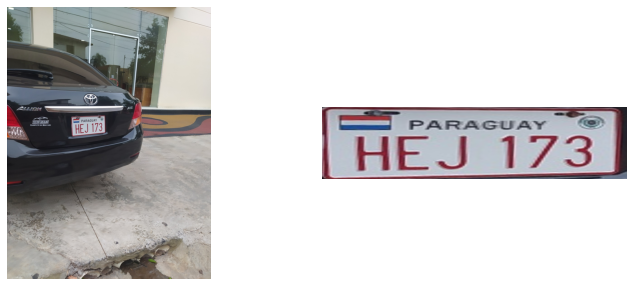

In [13]:
# Analiza la imgágen con el modelo wpod_net y retorna la imagen de la chapa y sus coordenadas
# Si dá error "No Licensese plate is founded!" Intente ajustar el valor de Dmin
def get_plate(image_path, Dmax=608, Dmin=256):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    # Obtiene imagen LpImg, y coordenadas del modelo wpod-net
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor

# Obtiene imagen de Chapa y coordenadas desde la imagen
test_image = image_paths[2]
LpImg,cor = get_plate(test_image)

print("Se detectó %i Chapa(s) en"%len(LpImg),splitext(basename(test_image))[0])
print("Coordenada de la(s) Chapa(s) en la imagen: \n", cor)

# Visualiza el resultado
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

#plt.savefig("part1_result.jpg",dpi=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


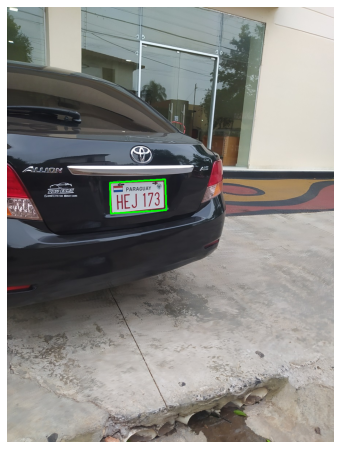

In [14]:
def draw_box(image_path, cor, thickness=3): 
    pts=[]  
    x_coordinates=cor[0][0]
    y_coordinates=cor[0][1]
    # Guarda el the top-left, top-right, bottom-left, bottom-right 
    # de la chapa respectivamente
    for i in range(4):
        pts.append([int(x_coordinates[i]),int(y_coordinates[i])])
    
    pts = np.array(pts, np.int32)
    pts = pts.reshape((-1,1,2))
    vehicle_image = preprocess_image(image_path)
    
    cv2.polylines(vehicle_image,[pts],True,(0,255,0),thickness)
    return vehicle_image

plt.figure(figsize=(8,8))
plt.axis(False)
plt.imshow(draw_box(test_image,cor))

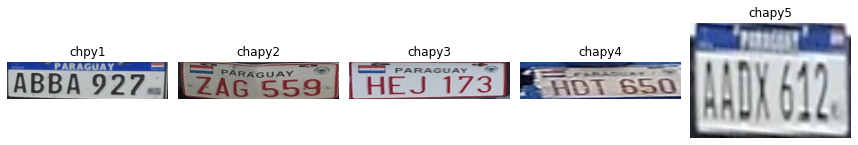

In [15]:
# Viualiza Todas las Chapas obtenidas de las imágenes de Vehículos de ejemplos. 
fig = plt.figure(figsize=(12,6))
cols = 5
rows = 1

fig_list = []

for i in range(cols*rows):
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(image_paths[i]))[0]
    fig_list[-1].set_title(title)
    #print(image_paths[i])
    LpImg,_ = get_plate(image_paths[i])
    plt.axis(False)
    plt.imshow(LpImg[0])
    plt.tight_layout(True)
plt.show()
#".\\"+ 


## Detección de varias chapas en una imagen

Se detectan 2 Chapa(s) en multiple_plates


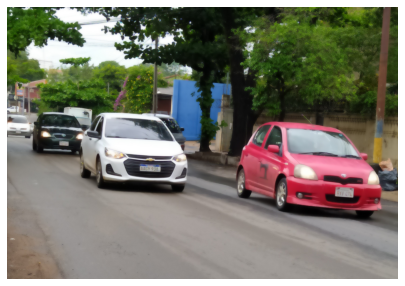

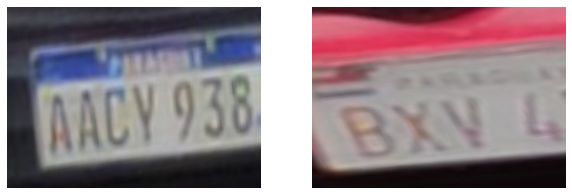

In [16]:
# Extraer mutiple Chapas en una imagen 

multiple_plates_image = "images/multiple_plates.jpg"
LpImg,cor = get_plate(multiple_plates_image)

print("Se detectan %i Chapa(s) en"%len(LpImg),splitext(basename(multiple_plates_image))[0])

# Visualiza la imágen original
plt.figure(figsize=(10,5))
plt.axis(False)
plt.imshow(preprocess_image(multiple_plates_image))

# Visualiza las chapas obtenidas 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(LpImg[1])
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])



## Fin Primera Parte